# Optimización Convexa y Cálculo Subdiferencial - Parte I

## Introducción
Este post no pretende ser un tratamiento exhaustivo o riguroso acerca de cálculo subdiferencial, tan sólo busca presentar una muy breve introducción al campo y una sencilla aplicación que aquellos familiarizados con el Aprendizaje Automático seguro conocerán: Regresión con Máquinas Vectoriales de Soporte. Adicionalmente, pretende recordarle a los *Ingenieros de Machine Learning* la importancia de conocer los fundamentos y detalles sobre optimización que no pocas veces son obviados; y a los usuarios de modelos optimización que hay un mundo más allá de los modelos de Programación Lineal Entera Mixta que también cuentan con algoritmos de rápida convergencia y que, en no pocos casos, también garantizan soluciones globales.

El cálculo subdiferencial puede ser visto como una generalización de los conceptos introducidos durante un curso tradicional de Cálculo I, donde la derivada y el gradiente son reemplazados por unos más abstractos donde ya no se cuenta con una única derivada o gradiente sino con un conjunto de estos. Tomemos por ejemplo la función $y = abs(x)$; en cálculo se nos enseña que esta función no es diferenciable puesto que:
$$
\lim_{x^+\to 0} f'(x^+) = 1 \\
\lim_{x^-\to 0} f'(x^-) = -1
$$
Es decir, la derivada *por la izquierda* es diferente a la derivada *por la derecha* en $x=0$, por tanto no existe para dicho punto; sin embargo, podemos considerar una definición más general, donde no tenemos una única derivada sino un conjunto de estas, es así como llegamos a las definiciones de **Subgradiente** y **Subdiferencial**.

***Subgradiente***: En $\mathbb{R}$, un subgradiente de la función $f: \mathbb{R} \rightarrow \mathbb{R}$ en un punto $x_0$ es un número $c$ perteneciente a $\mathbb{R}$ que satisface la siguiente desigualdad
$$
f(x) \geq f(x_0) + c(x-x_0)
$$

para todo $x \in dom(f)$.

Trasladando esta definición a $\mathbb{R^n}$ tenemos que un subgradiente de la función $f: \mathbb{R}^n \rightarrow \mathbb{R}$ en un punto $\boldsymbol{x_0}$ es un vector $\boldsymbol{c}$ perteneciente a $\mathbb{R}^n$ que satisface la siguiente desigualdad
$$
f($\boldsymbol{x}) \geq f(\boldsymbol{x_0}) + \boldsymbol{c}(\boldsymbol{x}-\boldsymbol{x_0})
$$

para todo $\boldsymbol{x} \in dom(f)$. Donde la negrilla indica que hacemos referencia vectores en lugar de escalares.

***Subdiferencial***: es simplemente el **conjunto** de subgradientes en un punto del dominio de la función.


***Función Subdiferenciable***: Al igual que las demás definiciones, esta es una extensión del concepto de diferenciabilidad. En este caso, una función subdiferenciable es aquella cuyo subdiferencial **es diferente del conjunto vacío** para todo punto de su dominio, es decir, que existe un al menos un subgradiente en todos los puntos, o en términos matemáticos:

$$
f(\boldsymbol{x}) | \partial f(\boldsymbol{x}) \neq \emptyset \quad \forall \boldsymbol{x} \in dom(f)
$$

Recordemos que una función es diferenciable si tiene derivada (diferencial) en cualquier punto de su dominio y esta es única, o en otros términos, el subdiferencial tiene **sólo un elemento** para cualquier punto en el dominio.

Como están planteadas, estas definiciones asumen el producto punto estándar y la norma inducida $\ell_2$; sin embargo pueden ser extendidas a otros espacios vectoriales y productos internos. Adicionalmente, tampoco se menciona el campo al que hace referencia, $\mathbb{R}$, sin embargo, estos son aspectos que van más allá del uso práctico.


## Un ejemplo
Estas definiciones se pueden entender fácilmente con un ejemplo. Como ya vimos, la función valor absoluto no es diferenciable en todo su dominio debido a la "punta" en $x=0$ ya que la derivada *por la izquierda* es igual -1 mientras que la derivada por la derecha es igual a 1; de hecho, el cálculo subdiferencial es bastante útil para estas funciones continuas pero con puntas (e.g.: funciones definidas por tramos lineales).

En la siguiente figura se presenta la función valor absoluto junto con **algunos** de sus subgradientes en $x=0$ de acuerdo con la definición previa. Cada una de las rectas punteadas es un subgradiente y puede ser interpretado como una barrera, ya que ningún subgradiente debe generar una aproximación de primer orden que exceda a la función (nótese que el gradiente se define como una desigualdad y que la formulación es análoga a una expansión de Taylor de primer orden.

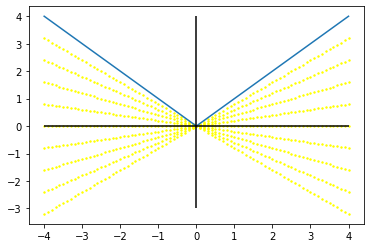

In [25]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-4, 4.1, 0.1)
m = np.arange(-0.8, 1, 0.2)
y = np.abs(x)

plt.plot(x, y)
for m in m:
    plt.scatter(x=x, y=(x*m), c="yellow", s=2)

plt.hlines(y=0, xmin=-4, xmax=4, colors="black")
plt.vlines(x=0, ymin=-3, ymax=4, colors="black")

## ¿Por qué es esto importante en optimización?
Para optimizar (en la mayoría de los casos) basta con aplicar el teorema de Fermat y derivar e igualar a cero; esto nos llevará a puntos críticos que, por lo menos, serán óptimos locales o puntos de silla. Generalizando para funciones como el valor absoluto, el *punto crítico* será aquel donde el subdiferencial incluye a 0. Este puede ser un escalar, en el caso de funciones en los reales o un vector en el caso de una función con dominio en $\mathbb{R}^n$.

En el caso de la función valor absoluto, únicamente el punto $x=0$ tiene el subgradiente igual a cero, en cualquier otro punto se incumple la desigualdad del subgradiente en algún punto de la función, en el siguiente ejemplo, la desigualdad se incumple en el intervalo $x \in (-2, 2)$, por lo que $m=0$ **no** puede ser parte del subdiferencial en $x=-2$ y por tanto **no** es un punto crítico.


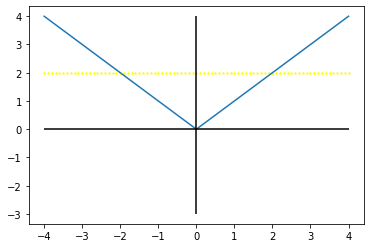

In [11]:

# x viene de la celda de código previa y es el vector donde están los puntos que queremos evaluar, m=0 es el que queremos evaluar

plt.plot(x, y)

x_0 = -2
m = 0
y_0 = abs(x_0) + m*(x-x_0)
plt.scatter(x=x, y=y_0, c="yellow", s=2)

plt.hlines(y=0, xmin=-4, xmax=4, colors="black")
plt.vlines(x=0, ymin=-3, ymax=4, colors="black")


Así entonces el subdiferencial de la función valor absoluto es:
$$
\partial f = \begin{cases}
-1 &\quad x < 0\\
[-1, 1] &\quad x = 0\\
1 &\quad x > 0\\
\end{cases}
$$


## Función de pérdida $\epsilon$-insensible

Algo que pasa desapercibido por muchos, especialmente los *ML Engineers* especialistas en el *split() train() predict() repeat*; es que estos modelos son, en realidad, problemas de optimización (numérica), y los desarrollos en este campo son fundamentales y necesarios para cualquier avance que se quiera hacer un Aprendizaje Automático.

Las técnicas de optimización (numérica) están siempre presentes. Un ejemplo de esto es la función de pérdida (o error) épsilon sensible utilizada que se muestra a continuación; la cual es ampliamente usada en los modelos de Regresión con Máquinas de Vectores de Soporte.


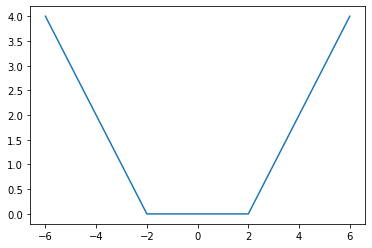

In [26]:
x = np.arange(-6, 6.1, 0.1)
eps = 2
f_eps = lambda x_0: max(0, abs(x_0)-eps)
y = np.array(list(map(f_eps, x)))

plt.plot(x, y)

La justificación para utilizar esta función de error radica en que quizás tenemos un rango donde nuestro problema es insensible al error, e.g.: debido a incertidumbre en la medición, y la función de error sólo debe penalizar valores fuera de este rango, $error \in (-2, 2)$ en el caso de ejemplo.

Se puede ver claramente que esta función no es diferenciable ya que la derivada no existe en -2 ni 2 pero sí es *subdiferenciable*, siendo su subdiferencial:

$$
\partial f = \begin{cases}
-1 &\quad x < -2\\
[-1, 0] &\quad x = -2\\
1 &\quad x > 2\\
[0, 1] &\quad x = -2\\
0 &\quad x \in (-2, 2)
\end{cases}
$$


Representando algunos subgradientes en $x=-2$ se puede ver claramente por qué hay un cero en estos intervalos:


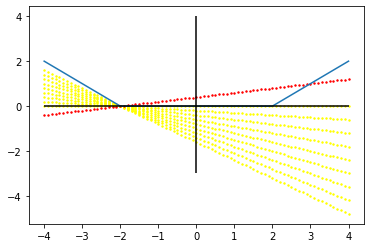

In [28]:
x = np.arange(-4, 4.1, 0.1)
eps = 2
f_eps = lambda x_0: max(0, abs(x_0)-eps)
y = np.array(list(map(f_eps, x)))

plt.plot(x, y)

m = np.arange(-0.8, 0.1, 0.1)

plt.hlines(y=0, xmin=-4, xmax=4, colors="black")
plt.vlines(x=0, ymin=-3, ymax=4, colors="black")

for m in m:
    plt.scatter(x=x, y=((x+2)*m), c="yellow", s=2)

plt.scatter(x=x, y=((x+2)*0.2), c="red", s=2)

Nótese que únicamente en la región donde la función es $\epsilon$-insensible puede el subgradiente ser igual a cero; también nótese que, si no se tiene como límite el cero, la desigualdad no se cumpliría en algunos puntos del intervalo, e.g.: línea punteada roja en la figura.

En la segunda parte mostraremos cómo, utilizando el concepto de subdiferencial junto con el teorema de Fermat, podemos emplear muchas de las herramientas de gradiente descendente que se han desarrollado en optimización. Por otra parte, si recordamos la forma de la función ReLU, principal determinante en la victoria de ImageNet en 2012 y la revolución del Aprendizaje Profundo, se puede apreciar la gran importancia que tiene la optimización de este tipo de funciones en el avance de esta tecnología.

Text(0.5, 1.0, 'Función ReLU')

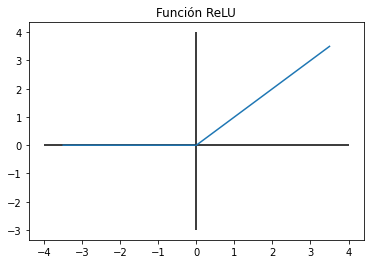

In [33]:
x = np.arange(-3.5, 3.6, 0.1)
eps = 2
f_eps = lambda x_0: max(0, x_0)
y = np.array(list(map(f_eps, x)))

plt.hlines(y=0, xmin=-4, xmax=4, colors="black")
plt.vlines(x=0, ymin=-3, ymax=4, colors="black")
plt.plot(x, y)

m = np.arange(-0.8, 0.1, 0.1)

plt.title("Función ReLU")